# Overhead in energy of the tools
To compute the overhead, we compare the energy consumed by the benchmarks with or without tools, as reported by the external power meter.
We start by averaging the energy over the ten repetitions. Another method is to randomly assign a experiment with tool to an experiment without tool, thus allowing us to compute the standart deviation.

In [3]:
REPOSITORY_DIR = "../../" # TO MODIFY
prefix = [REPOSITORY_DIR + "results/GPU_20_04/", REPOSITORY_DIR + "results/GPU_19_04/"] # ADD AS MANY FOLDER AS YOU NEED
#prefix = [REPOSITORY_DIR + "results/CPU_08_11/"]

import sys
sys.path.append(REPOSITORY_DIR + "code/")
import pandas as pd
import matplotlib.pyplot as plt

from utils.plots import FONTSIZE
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
import pandas as pd

In [4]:
energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])

exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
merged_df = pd.merge(energy_scope_df,grouped_watt_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec'])

merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])

b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df)

## Average energy over experiments

In [5]:
avg_table = exp_table[exp_table['tool_on_one_process']==False].groupby(by=['gpu_0_appli','gpu_0_appli_class','tool_name']).mean()
avg_table = avg_table[['tool_energy_consumption(kWh)_no_PUE', 'tool_energy_consumption(kWh)', 'bmc_node_power_watt_energy_consumption(kWh)', 'wattmetre_power_watt_energy_consumption(kWh)']]
avg_table

tool_energy_consumption(kWh)_no_PUE  \
gpu_0_appli gpu_0_appli_class tool_name                                                        
ep          E                 NoTool                                                     NaN   
                              carbon_tracker                                        0.032727   
                              codecarbon                                            0.038796   
                              energy scope                                          0.037722   
                              experiment_impact_tracker                             0.036892   
idle        sh                NoTool                                                     NaN   
                              carbon_tracker                                        0.008087   
                              codecarbon                                            0.011597   
                              energy scope                                          0.008903   
                              experiment_impact_tracker                             0.000132   
lu          D                 NoTool                                                     NaN   
                              carbon_tracker                                        0.075440   
                              codecarbon                                            0.090363   
                              energy scope                                          0.082301   
                              experiment_impact_tracker                             0.079384   
mg          D                 NoTool                                                     NaN   
                              carbon_tracker                                        0.028567   
                              codecarbon                                            0.038125   
                              energy scope                                          0.031377   
                              experiment_impact_tracker                             0.021114   

                                                         tool_energy_consumption(kWh)  \
gpu_0_appli gpu_0_appli_class tool_name                                                 
ep          E                 NoTool                                              NaN   
                              carbon_tracker                                 0.054654   
                              codecarbon                                     0.038796   
                              energy scope                                   0.037628   
                              experiment_impact_tracker                      0.058290   
idle        sh                NoTool                                              NaN   
                              carbon_tracker                                 0.013506   
                              codecarbon                                     0.011597   
                              energy scope                                   0.008836   
                              experiment_impact_tracker                      0.000209   
lu          D                 NoTool                                              NaN   
                              carbon_tracker                                 0.125984   
                              codecarbon                                     0.090363   
                              energy scope                                   0.082235   
                              experiment_impact_tracker                      0.125427   
mg          D                 NoTool                                              NaN   
                              carbon_tracker                                 0.047707   
                              codecarbon                                     0.038125   
                              energy scope                                   0.031309   
                              experiment_impact_tracker                    

In [6]:
avg_table = avg_table.reset_index()

def apply_overhead(row, df):
    appli_class = row['gpu_0_appli_class']
    appli = row['gpu_0_appli']
    return df[(df['gpu_0_appli']==appli)&(df['gpu_0_appli_class']==appli_class)&(df['tool_name']=='NoTool')]['wattmetre_power_watt_energy_consumption(kWh)'].values[0]

avg_table['corresponding_no_tool_wattmetre_power_watt_energy_consumption(kWh)'] = avg_table.apply(lambda row: apply_overhead(row, avg_table), axis=1)
avg_table['tool_energy_speedup'] = avg_table['corresponding_no_tool_wattmetre_power_watt_energy_consumption(kWh)']/avg_table['wattmetre_power_watt_energy_consumption(kWh)']
avg_table['tool_energy_overhead_perc'] = (1 - avg_table['tool_energy_speedup'])*100

In [7]:
avg_table

,gpu_0_appli,gpu_0_appli_class,tool_name,tool_energy_consumption(kWh)_no_PUE,tool_energy_consumption(kWh),bmc_node_power_watt_energy_consumption(kWh),wattmetre_power_watt_energy_consumption(kWh),corresponding_no_tool_wattmetre_power_watt_energy_consumption(kWh),tool_energy_speedup,tool_energy_overhead_perc
0,ep,E,NoTool,NaN,NaN,0.042313,0.048796,0.048796,1.000000,0.000000
1,ep,E,carbon_tracker,0.032727,0.054654,0.042219,0.049241,0.048796,0.990946,0.905437
2,ep,E,codecarbon,0.038796,0.038796,0.041838,0.048735,0.048796,1.001233,-0.123309
3,ep,E,energy scope,0.037722,0.037628,0.042895,0.048938,0.048796,0.997096,0.290417
4,ep,E,experiment_impact_tracker,0.036892,0.058290,0.042540,0.049210,0.048796,0.991569,0.843104
5,idle,sh,NoTool,NaN,NaN,0.011970,0.014501,0.014501,1.000000,0.000000
6,idle,sh,carbon_tracker,0.008087,0.013506,0.012150,0.014937,0.014501,0.970843,2.915671
7,idle,sh,codecarbon,0.011597,0.011597,0.011905,0.014541,0.014501,0.997287,0.271294
8,idle,sh,energy scope,0.008903,0.008836,0.012070,0.014527,0.014501,0.998244,0.175573
9,idle,sh,experiment_impact_tracker,0.000132,0.000209,0.012475,0.015096,0.014501,0.960600,3.939954


In [8]:
grouped_table = avg_table[
    avg_table['tool_name']!='NoTool'][
    ['gpu_0_appli', 'gpu_0_appli_class', 'tool_name', 'tool_energy_overhead_perc']
    ].groupby(['gpu_0_appli', 'gpu_0_appli_class'])
test_df = pd.DataFrame()
for name, group in grouped_table:
    test_df['tool_name']=group['tool_name'].values
    appli, appli_class = name
    column_name = '{} {}'.format(appli.upper(), appli_class)
    if appli == 'idle':
        column_name = 'Idle'
    test_df[column_name] = group['tool_energy_overhead_perc'].values
test_df['avg']=test_df[[col for col in test_df.columns if col != 'tool_name']].mean(axis=1).values
test_df['std']=test_df[[col for col in test_df.columns if col != 'tool_name']].std(axis=1).values

In [9]:
test_df

,tool_name,EP E,Idle,LU D,MG D,avg,std
0,carbon_tracker,0.905437,2.915671,1.262753,2.545482,1.907336,0.843098
1,codecarbon,-0.123309,0.271294,0.077307,-1.131484,-0.226548,0.540773
2,energy scope,0.290417,0.175573,0.151743,2.641917,0.814912,1.056124
3,experiment_impact_tracker,0.843104,3.939954,0.587648,1.789345,1.790013,1.319523


In [10]:
test_df.T.reset_index() #.rename(columns=test_df.loc[0]) #.drop(0).set_index('tool_name')

,index,0,1,2,3
0,tool_name,carbon_tracker,codecarbon,energy scope,experiment_impact_tracker
1,EP E,0.905437,-0.123309,0.290417,0.843104
2,Idle,2.915671,0.271294,0.175573,3.939954
3,LU D,1.262753,0.077307,0.151743,0.587648
4,MG D,2.545482,-1.131484,2.641917,1.789345
5,avg,1.907336,-0.226548,0.814912,1.790013
6,std,0.843098,0.540773,1.056124,1.319523


In [11]:
test_df = test_df.T.reset_index() 
test_df = test_df.rename(columns=test_df.iloc[0]).drop(0).set_index('tool_name')

test_df

,carbon_tracker,codecarbon,energy scope,experiment_impact_tracker
tool_name,,,,
EP E,0.905437,-0.123309,0.290417,0.843104
Idle,2.915671,0.271294,0.175573,3.939954
LU D,1.262753,0.077307,0.151743,0.587648
MG D,2.545482,-1.131484,2.641917,1.789345
avg,1.907336,-0.226548,0.814912,1.790013
std,0.843098,0.540773,1.056124,1.319523


In [12]:
test_df['avg']=test_df.mean(axis=1).values
test_df['std']=test_df.std(axis=1).values

In [13]:
#pd.options.display.float_format = "{:,.2f}".format
test_df = test_df.applymap(lambda x: '%.2f' % x)
test_df

,carbon_tracker,codecarbon,energy scope,experiment_impact_tracker,avg,std
tool_name,,,,,,
EP E,0.91,-0.12,0.29,0.84,0.48,0.42
Idle,2.92,0.27,0.18,3.94,1.83,1.64
LU D,1.26,0.08,0.15,0.59,0.52,0.47
MG D,2.55,-1.13,2.64,1.79,1.46,1.53
avg,1.91,-0.23,0.81,1.79,1.07,0.86
std,0.84,0.54,1.06,1.32,0.94,0.29


In [14]:
test_df.to_csv('/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/overhead.csv')

This table shows that the average overhead doesn't exceed 2 perc.

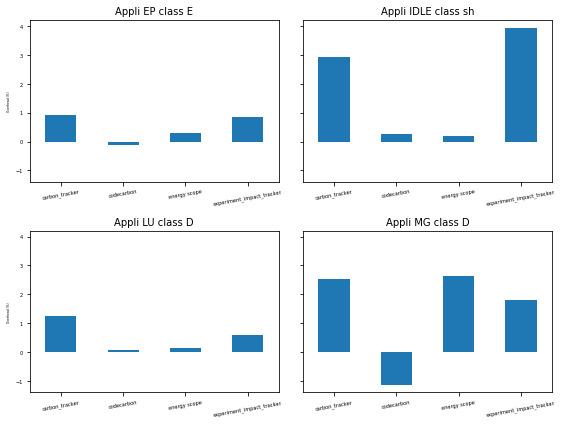

In [15]:
grouped_table = avg_table[avg_table['tool_name']!='NoTool'].groupby(['gpu_0_appli', 'gpu_0_appli_class'])
FONTSIZE = 10
nb_cols=2
plot_number = len(grouped_table)
if plot_number%nb_cols:
    nb_rows = plot_number//nb_cols+1
else:
    nb_rows = plot_number//nb_cols

FIGSIZE = (4*nb_cols,nb_rows*3)
fig, axes = plt.subplots(
    nrows=nb_rows, 
    ncols=nb_cols, 
    sharex=False, 
    sharey=True, 
    figsize=FIGSIZE
)
i=0
for name, group in grouped_table:
    axes[i//nb_cols][i%nb_cols] = group.plot(
        ax=axes[i//nb_cols][i%nb_cols],
        x='tool_name',
        y='tool_energy_overhead_perc',
        kind='bar',
        fontsize = FONTSIZE-5,
        rot=10,
        )
    appli, appli_class = name
    label = 'Appli {} class {}'.format(appli.upper(), appli_class)
    axes[i//nb_cols][i%nb_cols].set_title(label, fontsize=FONTSIZE)
    axes[i//nb_cols][i%nb_cols].set_ylabel('Overhead (%)', fontsize=FONTSIZE-7)
    axes[i//nb_cols][i%nb_cols].set_xlabel('')
    axes[i//nb_cols][i%nb_cols].get_legend().remove()
    i+=1
fig.tight_layout()

The MG

## Experiment by experiment
We group the with and without tool experiments as if they had an order. We compute the overhead of the group. Then we can do statistics (average, standart deviation) on the metric.

In [16]:
import random
import numpy as np

def compute_overhead(df):
    """Compute the overhead in energy for every row in df.

    Every row is matched to a random row from the NoTool group with the same benchmark.
    """
    df = df[df['tool_on_one_process']==False].copy()
    df = df.sort_values(by=['gpu_0_appli', 'gpu_0_appli_class', 'tool_name'])
    grouped_table = df.groupby(['gpu_0_appli', 'gpu_0_appli_class', 'tool_name'])
    corresponding_watt = []
    for name, group in grouped_table:
        appli, appli_class, _ = name
        no_tool_watt = df[(df['gpu_0_appli']==appli)&(df['gpu_0_appli_class']==appli_class)&(df['tool_name']=='NoTool')]['wattmetre_power_watt_energy_consumption(kWh)'].values
        #corresponding_watt = corresponding_watt + random.sample(list(no_tool_watt[-len(group):]), len(group))
        corresponding_watt = corresponding_watt + [np.median(no_tool_watt[-len(group):]) for i in range(len(group))]
    df['corresponding_no_tool_wattmetre_power_watt_energy_consumption(kWh)'] = corresponding_watt
    df['tool_energy_speedup'] = df['corresponding_no_tool_wattmetre_power_watt_energy_consumption(kWh)']/df['wattmetre_power_watt_energy_consumption(kWh)']
    df['tool_energy_overhead_perc'] = (1 - df['tool_energy_speedup'])*100
    return df

overhead_df = compute_overhead(exp_table[exp_table['gpu_0_appli']!="idle"])

In [17]:
overhead_df[overhead_df['tool_on_one_process']==False].groupby(by=['gpu_0_appli','gpu_0_appli_class','tool_name']).agg(['mean','std'])[['tool_energy_overhead_perc', 'tool_energy_consumption(kWh)', 'tool_energy_speedup', 'wattmetre_power_watt_energy_consumption(kWh)']]

tool_energy_overhead_perc  \
                                                                             mean   
gpu_0_appli gpu_0_appli_class tool_name                                             
ep          E                 NoTool                                    -0.142380   
                              carbon_tracker                             0.765883   
                              codecarbon                                -0.265767   
                              energy scope                               0.150102   
                              experiment_impact_tracker                  0.689995   
lu          D                 NoTool                                    -0.100086   
                              carbon_tracker                             1.164030   
                              codecarbon                                -0.023952   
                              energy scope                               0.051338   
                              experiment_impact_tracker                  0.482924   
mg          D                 NoTool                                     0.435670   
                              carbon_tracker                             2.973490   
                              codecarbon                                -0.685808   
                              energy scope                               2.987120   
                              experiment_impact_tracker                  2.087125   

                                                                   \
                                                              std   
gpu_0_appli gpu_0_appli_class tool_name                             
ep          E                 NoTool                     0.463264   
                              carbon_tracker             0.201411   
                              codecarbon                 0.450303   
                              energy scope               0.171608   
                              experiment_impact_tracker  1.219443   
lu          D                 NoTool                     0.257742   
                              carbon_tracker             0.232324   
                              codecarbon                 0.451068   
                              energy scope               0.343419   
                              experiment_impact_tracker  0.795695   
mg          D                 NoTool                     1.317353   
                              carbon_tracker             1.137960   
                              codecarbon                 1.105976   
                              energy scope               3.067871   
                              experiment_impact_tracker  3.818439   

                                                        tool_energy_consumption(kWh)  \
                                                                                mean   
gpu_0_appli gpu_0_appli_class tool_name                                                
ep          E                 NoTool                                             NaN   
                              carbon_tracker                                0.054654   
                              codecarbon                                    0.038796   
                              energy scope                                  0.037628   
                              experiment_impact_tracker                     0.058290   
lu          D                 NoTool                                             NaN   
                              carbon_tracker                                0.125984   
                              codecarbon                                    0.090363   
                              energy scope                                  0.082235   
                              experiment_impact_tracker                     0.125427   
mg          D                 NoTool                                             NaN   
                              carbon_tracker      

tool_name
CC              -0.265767
CT               0.765883
EIT              0.689995
ES               0.150102
Without\ntool   -0.142380
Name: Energy overhead (%), dtype: float64


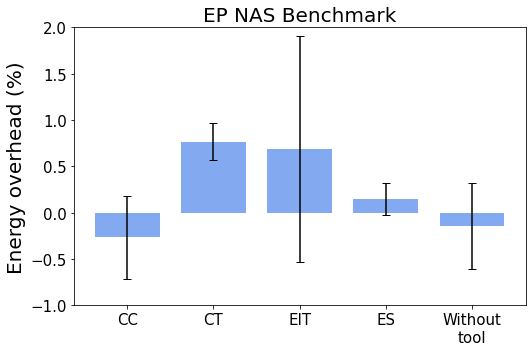

In [18]:
def bar_plot(df):
    cols = ['tool_energy_overhead_perc']
    new_cols = ['Energy overhead (%)']

    df = df.rename(columns={cols[i]: new_cols[i] for i in range(len(cols))})

    # group_by_cols = ['gpu_0_appli','gpu_0_appli_class','tool_name']
    group_by_cols = ['tool_name']
    figsize = (7.5,5)
    exp_nb = len(list(df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index))
    fig, axes = plt.subplots(
        1, 
        exp_nb, 
        figsize=figsize,
        sharex=False, 
        sharey=True,
    )
    i=0
    if exp_nb==1:
        axes=[axes]
    for appli, appli_class in list(df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index):
        title = "{} NAS Benchmark".format(appli.upper(), appli_class)
        if appli=='idle':
            title='Idle (60 seconds)'
        table = df[
            (df['gpu_0_appli']==appli
            )&(
            df['gpu_0_appli_class']==appli_class
            )&(
            df['tool_on_one_process']==False
            #)&(
            #df['tool_name']!='NoTool'
            )]
        print(table.groupby(by=group_by_cols).mean()['Energy overhead (%)'])
        axes[i] = table.groupby(by=group_by_cols).mean().plot(
            ax=axes[i], 
            y=new_cols,
            yerr=table.groupby(by=group_by_cols).std(),
            kind='bar',
            rot=0,
            fontsize=15,
            capsize=4,
            linewidth=2,
            width=0.75,
            alpha=0.8,
            color='cornflowerblue',
            )
        if i==0:
            axes[i].set_ylabel('Energy overhead (%)', fontsize=20)
        axes[i].set_xlabel('')
        axes[i].set(ylim=(-1,2))
        '''
        if i==exp_nb-1:
            axes[i].legend(bbox_to_anchor=(1, 1), fontsize=15)
        else:
        '''
        axes[i].get_legend().remove()
        axes[i].set_title(title, fontsize=20) #  y=-0.12, 
        i+=1
    fig.tight_layout()
    fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/overhead.png")

overhead_df = overhead_df.replace(to_replace='carbon_tracker', value='CT')
overhead_df = overhead_df.replace(to_replace='codecarbon', value='CC')
overhead_df = overhead_df.replace(to_replace='energy scope', value='ES')
overhead_df = overhead_df.replace(to_replace='experiment_impact_tracker', value='EIT')
overhead_df = overhead_df.replace(to_replace='NoTool', value='Without\ntool')

bar_plot(overhead_df[overhead_df['gpu_0_appli']=='ep'])